In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
import numpy as np
import os

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device used: {device.type}')

Device used: cpu


# Hyperparameters for project

In [2]:
train_size = 0.7
test_size = 1 - train_size
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# Data preprocessing


## Import the dataset
Dataset should be imported as a pytorch dataloader for batch optimization

In [3]:
# Create an empty array to store the image arrays and class
X = []
Y = []

# Define the folder paths containing the images
folder_paths = ['Dataset/Non_Demented/', 'Dataset/Very_Mild_Demented/', 'Dataset/Mild_Demented/', 'Dataset/Moderate_Demented/']
classes = [r'Non demented', r'Very mildly demented', r'mild demented', r'moderate demented']

# Loop over the images to save them in the list
for c, path in enumerate(folder_paths):
    items = os.listdir(path)
    for picture in items:
        file_path = os.path.join(path, picture)
        # Open the image and convert it to a NumPy array
        img = Image.open(file_path)
        array_representation = np.asarray(img)

        # Append the NumPy array to the list
        X.append(array_representation)
        Y.append(c)

# Convert the list of image arrays to a NumPy array
image_array = np.array(X)

# Shape of the array
print(image_array.shape)

(6400, 128, 128)


In [4]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

# Assuming you have a class named MyDataset for your dataset
class MyDataset(Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        img = self.X[idx]
        label = self.Y[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

# Define transformations, you can adjust these based on your needs
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to PyTorch tensor
])

# Create an instance of your dataset
dataset = MyDataset(X=image_array, Y=Y, transform=transform)

### Split into Test/Training sets

In [5]:
train_dataset, test_dataset = torch.utils.data.random_split(
        dataset, [int(train_size * len(dataset)), len(dataset) - int(train_size * len(dataset))]
    )

# Define DataLoader for training and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### Show example of dataset

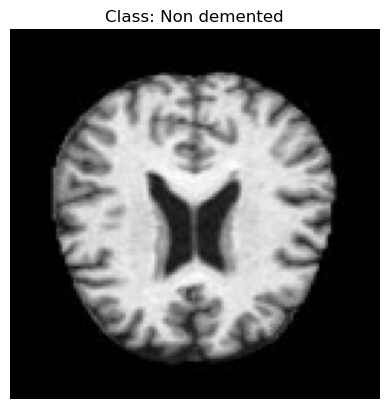

In [6]:
index_to_display = 0  # Image to show in dataset

# Get the image array and corresponding class
selected_image = image_array[index_to_display]
selected_class = classes[Y[index_to_display]]

# Display the image
plt.imshow(selected_image, cmap='gray')
plt.title(f'Class: {selected_class}')
plt.axis('off')  # Turn off axis labels
plt.show()

## Data augmentation

## Data normalization

# Architecture of the network